<a href="https://colab.research.google.com/github/f6ew/Bike_sharing_project/blob/main/Premliminary_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <font color='blue'> **Powerpuff  Girls Team**</font>

# Business Goal

*To determine which season is the best to add new bikes in bikes sharing service.

# Business Problem
* Bikes will be added if the number of users is expected to increase by 20% every season.

# Math Problem
* To predict the number of users for next year's seasons.

# Math Model
* Regression model

# Scenario of Model Usage
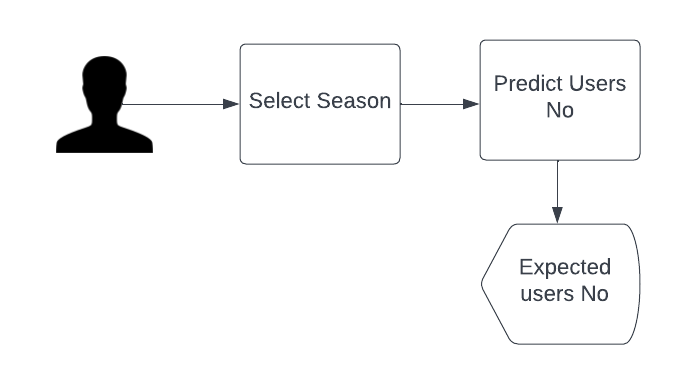

* The employee selects the season from the system to find out the expected number of users
* By clicking a predict button, the employee gets the expected number
* Compare the number with the previous season's users and the number of bikes available
* Based on the findings, the employee may decide to purchase more bikes this season

# Validation process (find an optimal model with the best performance)
* Split dataset (test, validation, training)
* K-Fold Cross-Validation
* Bootstrapping
* Random Subsampling

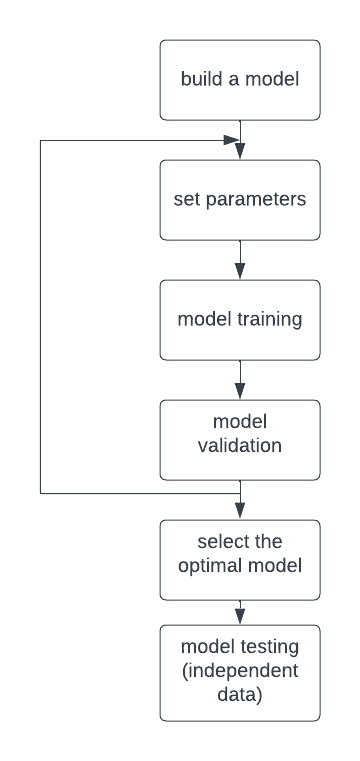


# Potential economic effect
* Cost: The cost of each bike
* Bike: Number of bikes will be added
* User: Number of users(expected to increase)
* Price: Price of renting each bike
* Month: Number of months

<font color='blue'>(revenue  - Expenses) * Month</font>

<font color='blue'>((User * Price) - (Cost * Bike)) * Month</font>


How our assumption can be effected? 
( ++ increase , -- decrese )

*Increasinh the price or got more customer, revenue + +

*Decreasing the number of new bikes or its cost, revenue ++

If we want to get new bikes, we might increase the price for each user.

what is the number of bike we need, without having the need to rise the price, and without high cost?


how to know the number of bikes?

depending on the historical data

From our model we can get this: 

(the expected number of users - number of users in the previous season/number of users in the previous season ) *100

Which give us the number of new users. 

# Preliminary Data Analysis

In [ ]:
from IPython.display import Image

import datetime
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics, model_selection, ensemble

import plotly.figure_factory as ff
import plotly.offline as py
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

In [ ]:
matplotlib.pyplot.style.use('ggplot')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/hour.csv')

In [ ]:
data.shape

(17379, 17)

In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Target function analysis

In [ ]:
data.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [ ]:
sea = ['Winter','Spring','Summer','Fall']
fig = px.bar(data, x= sea, y = data.season.value_counts(), labels='seasons',title= 'Rents Per Season')
fig.update_xaxes(title_text="Seasons")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

In [ ]:
x = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = px.bar(data, x= x, y = data.mnth.value_counts(), labels='seasons',title= 'Rents Per Month')
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

In [ ]:
data.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [ ]:
dt = data.holiday.value_counts()
ds = ['No', 'Yes']
fig = px.pie(data, values = dt,title= 'Rents During Holidays', names=ds)
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

In [ ]:
dt = data.workingday.value_counts()
ds = ['Yes', 'No']
fig = px.pie(data, values = dt,title= 'Rents During Holidays', names=ds)
fig.update_xaxes(title_text="Months")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

In [ ]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
fig = px.bar(data, x= week, y = data.weekday.value_counts(), labels='Week Days',title= 'Rents Per Week Days')
fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

In [ ]:
dt = data.hr.value_counts()
ds = data.hr.unique()
fig = px.pie(data, values = dt,title= 'Rents Per Hour', names=ds)
fig.update_xaxes(title_text="Hours")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

In [ ]:
temp_store = []
for i in x.index:
  a = 47 * i - 8
  temp_store.append(round(a))

In [ ]:
temp_store = zip(temp_store, x)

In [ ]:
temp_stored = list(temp_store)

In [ ]:
df = pd.DataFrame.from_dict(temp_stored)
df.columns = ['temp', 'value']

In [ ]:
fig = px.line(df, y= df.temp, x = df.value, labels='Temperature',title= 'Rents Per Temperature')
fig.update_xaxes(title_text="Number of Rents")
fig.update_yaxes(title_text="Temperature")

fig.show(renderer="colab")

In [ ]:
dt = ['Clear','Cloudy','Light Snow','Heavy Rain']
fig = px.bar(data, x= dt, y = data.weathersit.value_counts(), labels='Weather',title= 'Rents Per Weather Conditions')
fig.update_xaxes(title_text="Weather")
fig.update_yaxes(title_text="Number of Rents")
fig.show(renderer="colab")

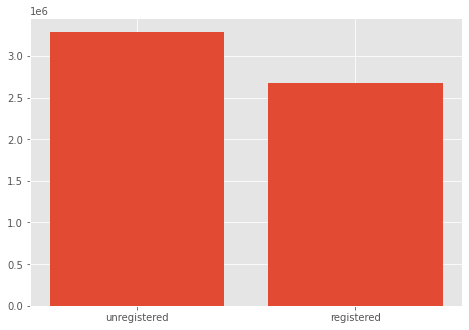

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cnt = [data.cnt.sum(), data.registered.sum()]
lable = ['unregistered', 'registered']
ax.bar(lable,cnt)
plt.show()

## Correlation Analysis

In [ ]:
data.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [ ]:
dst = data.drop('dteday', axis=1)
for col in dst.columns:
  target_corr = data.corr()[col]

  fig = go.Figure([go.Bar(y = target_corr, x = target_corr.index, marker_color = 'red')])

  fig.update_layout(xaxis_title = col, yaxis_title = "Correlation",
      yaxis = dict(
          range=(-1, 1),
          showticklabels=True
      ))
  fig.show(renderer="colab")

In [ ]:
target_corr = data.corr()['season']

fig = go.Figure([go.Bar(y = target_corr, x = target_corr.index, marker_color = 'red')])

fig.update_layout(xaxis_title = "Features", yaxis_title = "Correlation",
    yaxis = dict(
        range=(-1, 1),
        showticklabels=True
    ))
fig.show(renderer="colab")

In [ ]:
for feature in  ['mnth', 'weekday', 'temp','atemp','season']:

    fig = go.Figure()
    fig.add_trace(go.Histogram(x = data[data.workingday == 1][feature], 
                 marker_color = 'green', opacity = 0.6, nbinsx = 10,  name = 'Yes', histnorm = 'probability'))

    fig.add_trace(go.Histogram(x = data[data.workingday == 0][feature],
                 marker_color = 'red', opacity = 0.6,nbinsx = 10, name = 'No', histnorm = 'probability'))

    fig.update_layout(
        legend = dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
        ),
        xaxis_title = feature,
        yaxis_title = "Share"
    )
    fig.show(renderer="colab")

In [ ]:
correlation_matrix = data.corr()

fig = go.Figure(data=go.Heatmap(
                   z = correlation_matrix,
                   x = correlation_matrix.columns,
                   y = correlation_matrix.index,
                   hoverongaps = False,
                   xgap = 1,
                   ygap = 1,
                   zmin = -1,
                   zmax = 1,
    colorscale = 'rdbu_r'
))

fig.update_xaxes(side="top")
fig.update_layout(xaxis_title = "Features", yaxis_title = "Features")
fig.show(renderer="colab")